In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
dataset_dir = "D:\Programming\ML\Prodigy_Infotech\Hand_Gesture\Data\leapGestRecog"

In [3]:
image_paths = []
image_labels = []
for main_dir in os.listdir(dataset_dir):
    for sub_dir in os.listdir(os.path.join(dataset_dir, main_dir)):
        for image_file in os.listdir(os.path.join(dataset_dir, main_dir, sub_dir)):
            image_paths.append(os.path.join(dataset_dir, main_dir, sub_dir, image_file))
            image_labels.append(sub_dir)

In [4]:
image_series = pd.Series(image_paths, name="ImagePaths")
label_series = pd.Series(image_labels, name="Labels")
gesture_data = pd.concat([image_series, label_series], axis=1)
gesture_df = pd.DataFrame(gesture_data)

print(gesture_df.head())

                                          ImagePaths   Labels
0  D:\Programming\ML\Prodigy_Infotech\Hand_Gestur...  01_palm
1  D:\Programming\ML\Prodigy_Infotech\Hand_Gestur...  01_palm
2  D:\Programming\ML\Prodigy_Infotech\Hand_Gestur...  01_palm
3  D:\Programming\ML\Prodigy_Infotech\Hand_Gestur...  01_palm
4  D:\Programming\ML\Prodigy_Infotech\Hand_Gestur...  01_palm


In [9]:
print(pd.Series(image_labels).value_counts())

01_palm          2000
03_fist          2000
04_fist_moved    2000
05_thumb         2000
06_index         2000
07_ok            2000
08_palm_moved    2000
09_c             2000
10_down          2000
02_l             2000
05                 10
08                 10
07                 10
06                 10
00                 10
04                 10
03                 10
02                 10
01                 10
09                 10
Name: count, dtype: int64


In [11]:
X_train, X_test = train_test_split(gesture_df, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(gesture_df, test_size=0.3, random_state=42)

In [13]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

train_data = data_gen.flow_from_dataframe(dataframe=train_set, x_col="ImagePaths", y_col="Labels",
                                          target_size=(224, 224), color_mode='rgb', class_mode="categorical",
                                          batch_size=4, shuffle=True)

test_data = data_gen.flow_from_dataframe(dataframe=X_test, x_col="ImagePaths", y_col="Labels",
                                         target_size=(224, 224), color_mode='rgb', class_mode="categorical",
                                         batch_size=4, shuffle=False)

val_data = data_gen.flow_from_dataframe(dataframe=val_set, x_col="ImagePaths", y_col="Labels",
                                        target_size=(224, 224), color_mode='rgb', class_mode="categorical",
                                        batch_size=4, shuffle=False)

class_names = list(train_data.class_indices.keys())
print(class_names)

Found 14004 validated image filenames belonging to 10 classes.


D:\anaconda_downloader\Anaconda\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 66 invalid image filename(s) in x_col="ImagePaths". These filename(s) will be ignored.
  warnings.warn(


Found 3997 validated image filenames belonging to 10 classes.


D:\anaconda_downloader\Anaconda\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 23 invalid image filename(s) in x_col="ImagePaths". These filename(s) will be ignored.
  warnings.warn(


Found 5996 validated image filenames belonging to 10 classes.
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


D:\anaconda_downloader\Anaconda\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 34 invalid image filename(s) in x_col="ImagePaths". These filename(s) will be ignored.
  warnings.warn(


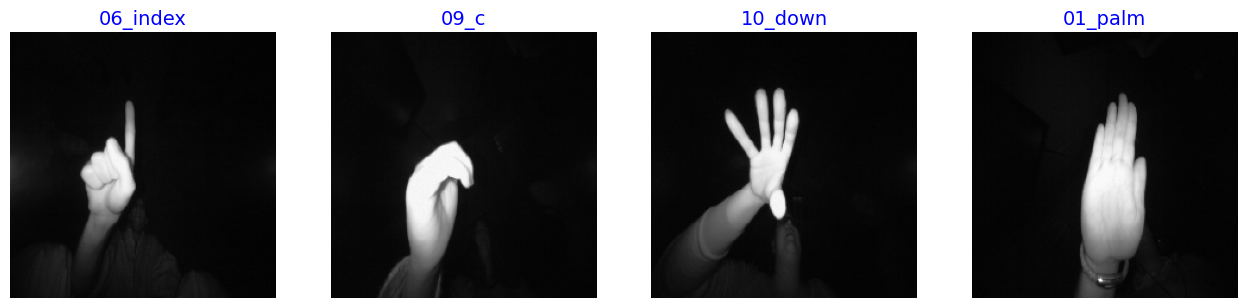

In [15]:
def visualize_gestures(image_gen):
    class_dict = image_gen.class_indices
    class_list = list(class_dict.keys())
    img_batch, label_batch = next(image_gen)
    plt.figure(figsize=(20, 20))
    num_images = len(label_batch)
    display_count = min(num_images, 25)
    for i in range(display_count):
        plt.subplot(5, 5, i + 1)
        img = (img_batch[i] + 1) / 2
        plt.imshow(img)
        class_idx = np.argmax(label_batch[i])
        class_label = class_list[class_idx]
        plt.title(class_label, color="blue", fontsize=14)
        plt.axis('off')
    plt.show()

visualize_gestures(train_data)

In [17]:
model = Sequential([
    Conv2D(128, (8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(256, (1, 1), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(256, (1, 1), strides=(1, 1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 128)       24704     
                                                                 
 batch_normalization (Batch  (None, 73, 73, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 256)       819456    
                                                                 
 batch_normalization_1 (Bat  (None, 73, 73, 256)       1024      
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                        

In [21]:
history = model.fit(train_data, epochs=3, validation_data=val_data, verbose=1)

Epoch 1/3
3501/3501 [==============================] - 3066s 875ms/step - loss: 0.5238 - accuracy: 0.8368 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 2/3
3501/3501 [==============================] - 4297s 1s/step - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 3/3
3501/3501 [==============================] - 3342s 954ms/step - loss: 0.0087 - accuracy: 0.9979 - val_loss: 9.9080e-04 - val_accuracy: 0.9998


In [22]:
model.evaluate(test_data, verbose=1)

1000/1000 [==============================] - 209s 209ms/step - loss: 1.8636e-04 - accuracy: 1.0000


[0.00018635755986906588, 1.0]

In [23]:
model.save("hand_gesture_model.h5")

D:\anaconda_downloader\Anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

1000/1000 [==============================] - 208s 207ms/step


In [25]:
label_map = (train_data.class_indices)
label_map = dict((v, k) for k, v in label_map.items())
predicted_labels = [label_map[k] for k in predicted_classes]

In [26]:
true_labels = test_data.classes[:len(predicted_labels)]
true_label_names = [label_map[k] for k in true_labels]

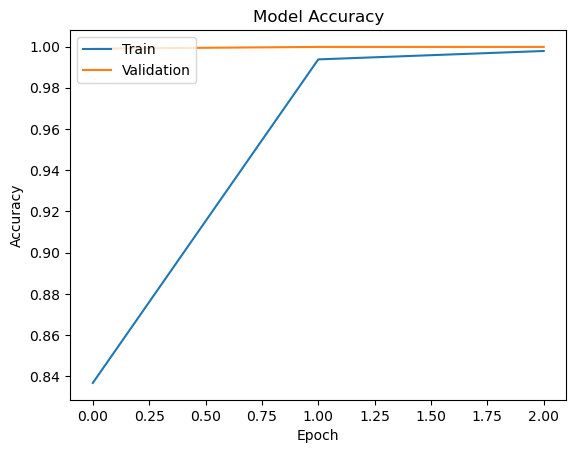

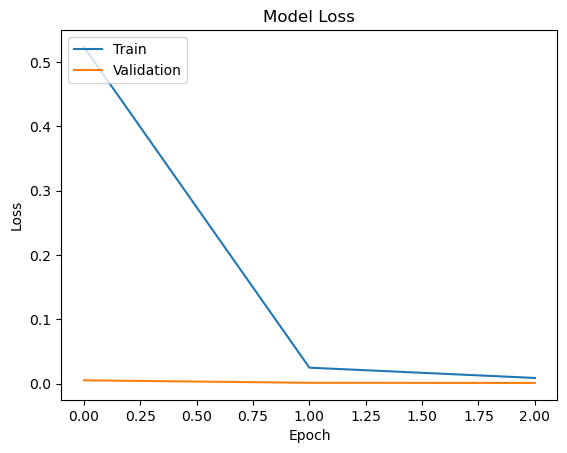

               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       418
         02_l       1.00      1.00      1.00       393
      03_fist       1.00      1.00      1.00       433
04_fist_moved       1.00      1.00      1.00       427
     05_thumb       1.00      1.00      1.00       366
     06_index       1.00      1.00      1.00       400
        07_ok       1.00      1.00      1.00       388
08_palm_moved       1.00      1.00      1.00       416
         09_c       1.00      1.00      1.00       388
      10_down       1.00      1.00      1.00       368

     accuracy                           1.00      3997
    macro avg       1.00      1.00      1.00      3997
 weighted avg       1.00      1.00      1.00      3997

Model Accuracy: 100.0%


In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print(classification_report(true_label_names, predicted_labels))
print("Model Accuracy: {:.1f}%".format(accuracy_score(true_label_names, predicted_labels) * 100))

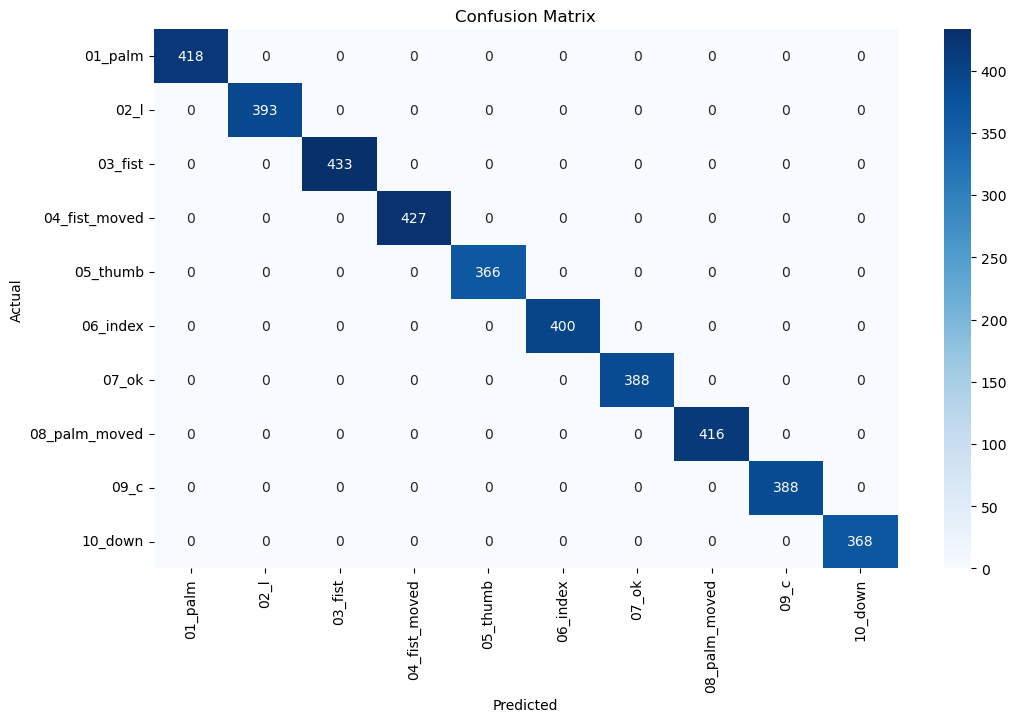

In [39]:
cm = confusion_matrix(true_label_names, predicted_labels)
plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Code for real time gesture analysis ###( remove comment and run )

In [30]:
# import cv2
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# import time

# model = load_model('hand_gesture_model.h5')

# labels = ['Palm', 'l', 'Fist', 'Fist_moved', 'Thumb', 'Index', 'Ok', 'Palm_moved', 'C', 'Down']

# cap = cv2.VideoCapture(0)

# def preprocess_image(img):
#     img = cv2.resize(img, (224, 224))
#     img = img.astype('float32') / 255.0
#     img = np.expand_dims(img, axis=0)
#     return img

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break
    
#     frame = cv2.flip(frame, 1)

#     height, width, _ = frame.shape
#     x1, y1, x2, y2 = width//2-112, height//2-112, width//2+112, height//2+112
#     cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
#     roi = frame[y1:y2, x1:x2]

#     roi_processed = preprocess_image(roi)
    
#     prediction = model.predict(roi_processed)
#     predicted_label = labels[np.argmax(prediction)]

#     cv2.putText(frame, predicted_label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
#     cv2.imshow("Hand Gesture Recognition", frame)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()
